In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

food_reviews_data = pd.read_csv("/content/drive/MyDrive/CS404_BDA_PROJECT/Reviews.csv")


In [ ]:
food_reviews_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
food_reviews_data.shape

(568454, 10)

In [ ]:
food_reviews_data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [ ]:
food_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
food_reviews_data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
food_reviews_data.describe()['Score'].T

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

In [ ]:
food_reviews_data.rename(columns={'Score':'Rating'}, inplace=True )

In [ ]:
food_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Rating                  568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
#Find the minimum and maximum ratings

print('Minimum rating is: %d' %(food_reviews_data.Rating.min()))
print('Maximum rating is: %d' %(food_reviews_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [ ]:
# pre-processing

# check for missing values
print('Number of missing values across columns: \n', food_reviews_data.isnull().sum())

Number of missing values across columns: 
 Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Rating                     0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [ ]:
# dropping rows with missing values
food_reviews_data.dropna(inplace=True)

In [ ]:
# check for missing values again
print('Number of missing values across columns: \n', food_reviews_data.isnull().sum())

Number of missing values across columns: 
 Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Rating                    0
Time                      0
Summary                   0
Text                      0
dtype: int64


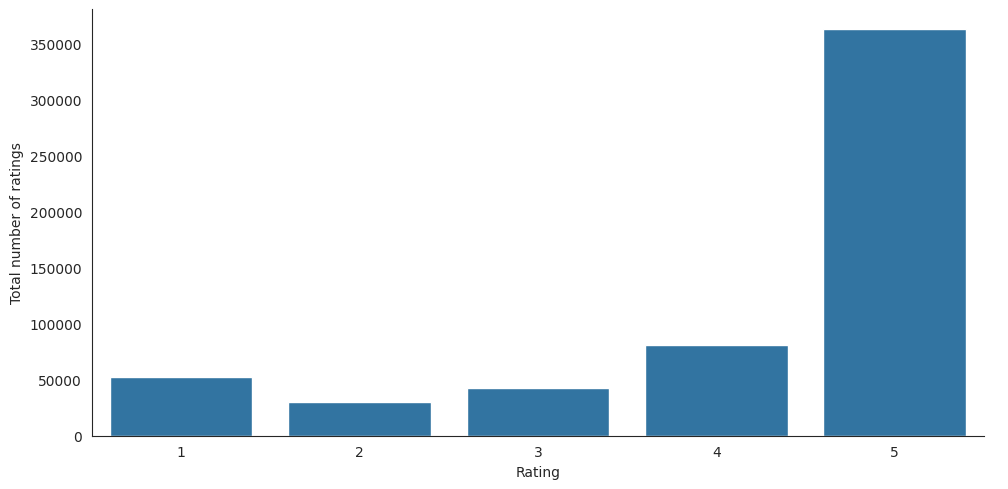

In [ ]:
import seaborn as sns

with sns.axes_style('white'):
    g = sns.catplot(x="Rating", data=food_reviews_data, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")


In [ ]:
# Unique Users and products

import numpy as np

print("\nTotal no of ratings :", food_reviews_data.shape[0])
print("Total No of Users   :", len(np.unique(food_reviews_data.UserId)))
print("Total No of products  :", len(np.unique(food_reviews_data.ProductId)))


Total no of ratings : 568401
Total No of Users   : 256042
Total No of products  : 74257


In [ ]:
# Analysis of rating given by the user

no_of_rated_products_per_user = food_reviews_data.groupby(by='UserId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
Name: Rating, dtype: int64

In [ ]:
no_of_rated_products_per_user.describe()

count    256042.000000
mean          2.219952
std           4.443268
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         448.000000
Name: Rating, dtype: float64

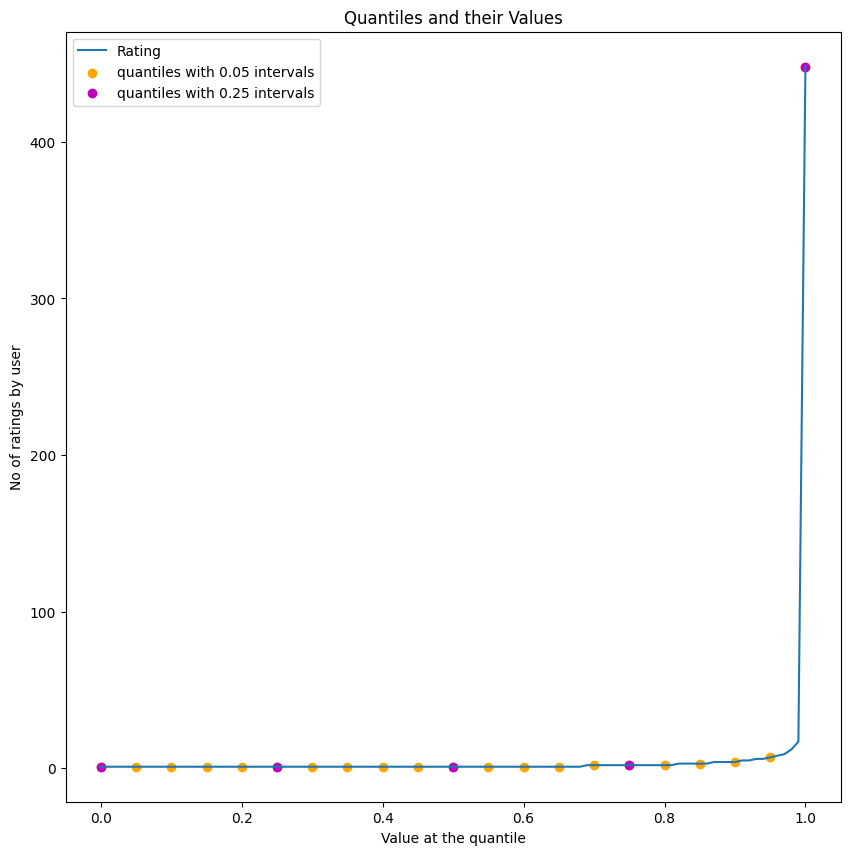

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()


In [ ]:
print('\n No of products rated more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of products rated more than 50 per user : 267



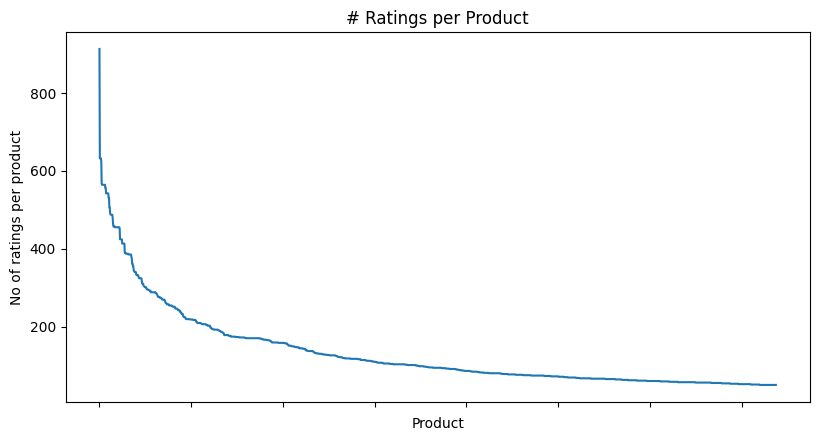

In [ ]:
# Popularity based recommendation to new users
import matplotlib.pyplot as plt

# getting data frame that contains products who got more than 50 ratings (popular products)
new_df = food_reviews_data.groupby("ProductId").filter(lambda x:x['Rating'].count() >=50)

no_of_ratings_per_product = new_df.groupby(by='ProductId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# Ratings per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [ ]:
# Average rating of the product

new_df.groupby('ProductId')['Rating'].mean().head()

ProductId
7310172001    4.751445
7310172101    4.751445
B00004CI84    4.486772
B00004CXX9    4.405128
B00004RAMY    4.104651
Name: Rating, dtype: float64

In [ ]:
new_df.groupby('ProductId')['Rating'].mean().sort_values(ascending=False).head()

ProductId
B000ED9L9E    4.973451
B000O5DI1E    4.906542
B001E6GFKI    4.887500
B000NMJWZO    4.881919
B0044MTGHI    4.880000
Name: Rating, dtype: float64

In [ ]:
# Total no of ratings for product

new_df.groupby('ProductId')['Rating'].count().sort_values(ascending=False).head()

ProductId
B007JFMH8M    913
B002QWP8H0    632
B002QWP89S    632
B002QWHJOU    632
B0026RQTGE    632
Name: Rating, dtype: int64

In [ ]:
# filtering the products with largest count of ratings and which are highly rated on average

ratings_mean_count = pd.DataFrame(new_df.groupby('ProductId')['Rating'].mean())

ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('ProductId')['Rating'].count())

ratings_mean_count.head()

,Rating,rating_counts
ProductId,,
7310172001,4.751445,173
7310172101,4.751445,173
B00004CI84,4.486772,189
B00004CXX9,4.405128,195
B00004RAMY,4.104651,172


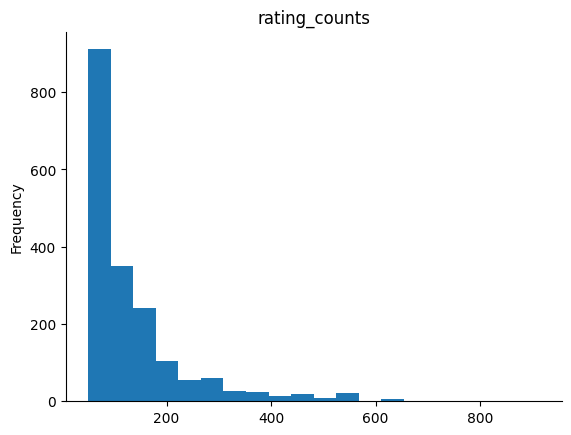

In [ ]:
# rating_counts

ratings_mean_count['rating_counts'].plot(kind='hist', bins=20, title='rating_counts')
plt.gca().spines[['top', 'right',]].set_visible(False)

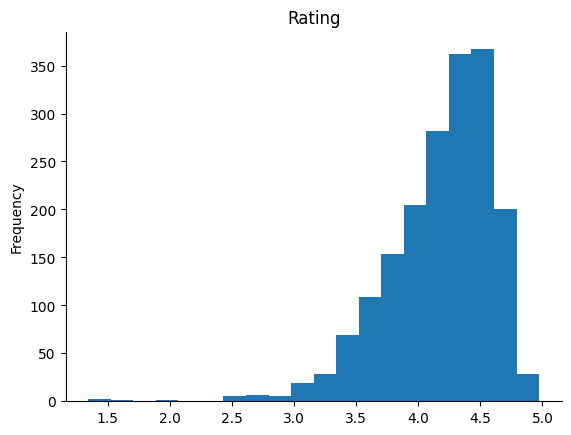

In [ ]:
# Rating

ratings_mean_count['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
ratings_mean_count['rating_counts'].max()

913

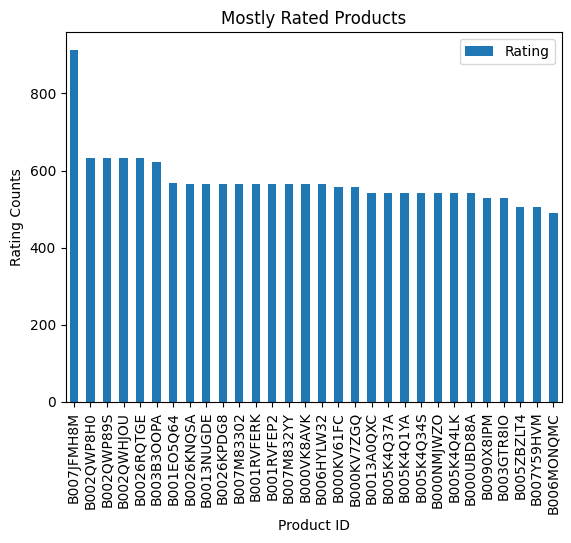

In [ ]:
# Visualization of popular products

popular_products = pd.DataFrame(new_df.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")
plt.title('Mostly Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Rating Counts')
plt.show()


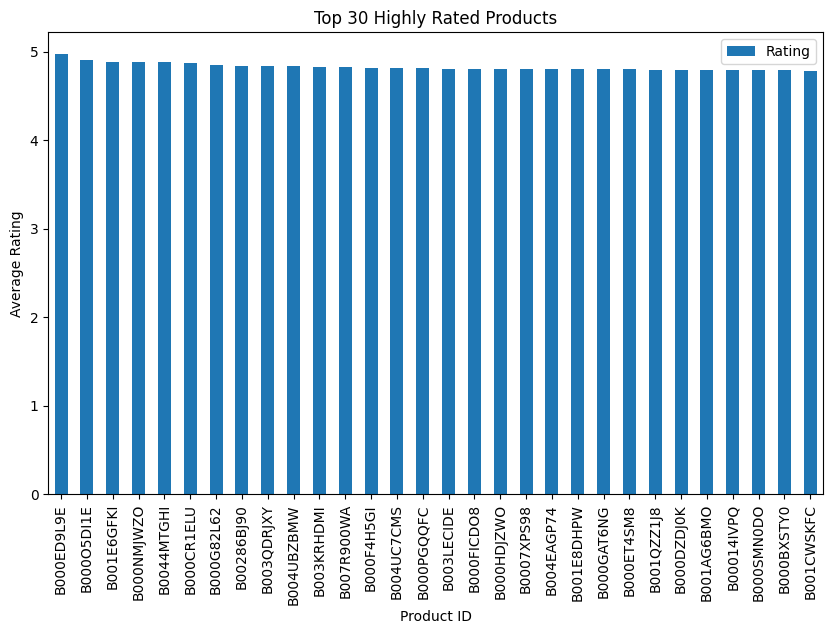

In [ ]:
# Visualization of top rated products
average_rating_per_product = pd.DataFrame(new_df.groupby('ProductId')['Rating'].mean())

top_rated_products = average_rating_per_product.sort_values(by='Rating', ascending=False)

# Plot the top 30 highly rated products
top_rated_products.head(30).plot(kind='bar', figsize=(10, 6))
plt.title('Top 30 Highly Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162995 sha256=f2ea38409e84a62561b5b8c011b310fa1be582f5c77e19a63ea6d4b33c2eb4f1
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


Look into this code: (see if u can further filter the items)


**Item based Collaborative Filtering using KNNWithMeans Algorithm** (based on user-item previous interactions)

In [ ]:
new_df.shape

(243072, 10)

In [ ]:
# (similarity between items based on user interactions)

# new_df is data frame that contains products which got more than 50 ratings (popular products)

from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader

# Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df[['UserId', 'ProductId', 'Rating']], reader)

# Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3, random_state=10)


# try using square root of number of transactions for optimal value of k
# Use user_based true/false to switch between user-based or item-based collaborative filtering

algo = KNNWithMeans(k=440, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
from surprise.model_selection import cross_validate

# Define a range of K values to test
k_values = range(300, 500, 1)

# Initialize lists to store K values and corresponding accuracy scores
k_list = []
accuracy_list = []

# Iterate over different K values
for k in k_values:
    # Train the KNNWithMeans algorithm with the current K value
    algo = KNNWithMeans(k=k, sim_options={'name': 'pearson_baseline', 'user_based': False})
    algo.fit(trainset)

    # Evaluate the model using cross-validation (optional but recommended)
    cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    avg_rmse = np.mean(cv_results['test_rmse'])

    # Store K value and corresponding accuracy score
    k_list.append(k)
    accuracy_list.append(avg_rmse)

# Plot the accuracy vs K-value graph
plt.plot(k_list, accuracy_list, marker='o')
plt.title('Accuracy vs K-value for KNNWithMeans')
plt.xlabel('K-value')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.show()


In [ ]:
# run the trained model against the testset
test_pred = algo.test(testset)

# Display the first few predictions
for pred in test_pred[:20]:
    print(pred)

user: A1EC6RGTJN9I8K item: B005DFL4PM r_ui = 5.00   est = 5.00   {'actual_k': 2, 'was_impossible': False}
user: A2RME4353Y911C item: B0037QGKSK r_ui = 3.00   est = 3.84   {'actual_k': 2, 'was_impossible': False}
user: A1TAARTDC411Q0 item: B004779XHI r_ui = 5.00   est = 4.98   {'actual_k': 3, 'was_impossible': False}
user: A36HQGRJWI5LSG item: B000H1217M r_ui = 5.00   est = 5.00   {'actual_k': 5, 'was_impossible': False}
user: A2CA0DTV2JFL0F item: B003CK7MME r_ui = 5.00   est = 4.97   {'actual_k': 6, 'was_impossible': False}
user: A1WOO2G7ECIP10 item: B002ZX1U9A r_ui = 5.00   est = 5.00   {'actual_k': 3, 'was_impossible': False}
user: A1GEUPI7SIJQ4Z item: B001EYUE5M r_ui = 5.00   est = 5.00   {'actual_k': 2, 'was_impossible': False}
user: A1S2U7YG3K11HZ item: B000EVOSE4 r_ui = 5.00   est = 4.17   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AEYYRO0ERDP3A item: B0013A0QXC r_ui = 2.00   est = 4.17   {'was_impossible': True, 'reason': 'User and/or item is unknow

In [ ]:
# get RMSE

print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.7536


0.7536035754831731

**USING THE TRAINED ITEM-BASED COLLABORATIVE MODEL TO RECOMMEND ITEMS TO A USER BASED ON THE USER'S PREVIOUS USER-ITEM INTERACTIONS**

In [ ]:
def recommend_items_to_user(user_id, num_items_to_recommend=5):

    # Get a list of all item IDs
    all_item_ids = set(new_df['ProductId'].unique())

    # Filter out item IDs that the user has already interacted with
    user_interacted_items = set(new_df[new_df['UserId'] == user_id]['ProductId'].unique())
    items_to_ignore = user_interacted_items

    # Compute predictions for items that the user hasn't interacted with
    items_to_recommend = list(all_item_ids - items_to_ignore)
    predictions = [(item_id, algo.predict(user_id, item_id).est) for item_id in items_to_recommend]

    # Sort the predictions by estimated rating in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

    # Return the top N recommended items
    top_recommendations = sorted_predictions[:num_items_to_recommend]

    return top_recommendations


user_id = 'A3OXHLG6DIBRW8'
recommended_items = recommend_items_to_user(user_id)
print("Recommended items for user", user_id, ":")
for item_id, rating in recommended_items:
    print("Item ID:", item_id, ", Estimated Rating:", rating)



Recommended items for user A3OXHLG6DIBRW8 :
Item ID: B000EVOSE4 , Estimated Rating: 5
Item ID: B0027UYT4O , Estimated Rating: 5
Item ID: B00474VPY0 , Estimated Rating: 5
Item ID: B00474VPLI , Estimated Rating: 5
Item ID: B000KEPBBY , Estimated Rating: 5


**Item-Item Collaborative Filtering using Matrix Decomposition**
(based on similar items)
Latent Factor based


In [ ]:
new_df.shape

(243072, 10)

The cell values represent ratings given by users to products.

In [ ]:
new_df1= new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_matrix.head()


ProductId,B000084ETV,B00008JOL0,B000255OIG,B0007A0AP8,B000DZKKK2,B000EM6PC6,B000EVIDUY,B000FBM3YK,B000FNEX50,B000G6MBX2,...,B004P4TL8E,B004ZIER34,B00503DP0O,B005K4Q1VI,B00622CYVI,B006N3IG4K,B007TJGZ54,B007TJGZ5E,B0089SPDUW,B008ZRKZSM
UserId,,,,,,,,,,,,,,,,,,,,,
A1004703RC79J9,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0.0,0,0.0,0,0
A1008DPSP6KC9J,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0.0,0,0.0,0,0
A100WO06OQR8BQ,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0.0,0,0.0,0,0
A101C99CG8EFUH,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0.0,0,0.0,0,0
A102UXGLDF76G1,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0.0,0,0.0,0,0


As shown, the utility matrix is pretty sparse.

In [ ]:
ratings_matrix.shape

(8664, 69)

In [ ]:
X = ratings_matrix.T
X.head()

UserId,A1004703RC79J9,A1008DPSP6KC9J,A100WO06OQR8BQ,A101C99CG8EFUH,A102UXGLDF76G1,A10389F7LRIZWQ,A103U3KR4L2ZXT,A103WGMGH35ZF7,A1048HOW441Z1L,A104FEDJNPUIPS,...,AZS05OYE0XGNF,AZTBQJGZ08YAC,AZVQMPXZEHQGZ,AZVR7NPPEDMMN,AZWC23X2AZAQC,AZXE27S06IW5D,AZYJE40XW6MFG,AZZH3GGYQSBUC,AZZHZZMH3U1VB,AZZMO52V8WZ68
ProductId,,,,,,,,,,,,,,,,,,,,,
B000084ETV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00008JOL0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000255OIG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0007A0AP8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000DZKKK2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [ ]:
X.shape

(69, 8664)

In [ ]:
# Decomposing the Matrix

from sklearn.decomposition import TruncatedSVD

# n is the number of dimensions
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(69, 10)

In [ ]:
 # Correlation Matrix (using pearson correlation coefficient)
import numpy as np

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(69, 69)

In [ ]:
X.index[60]

'B004ZIER34'

In [ ]:
i = "B004ZIER34"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

60

Correlation for all items with the item purchased by this customer based on items rated by other customers who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(69,)

It indicates the number of correlations between the specified product and all other products.


**Recommending top 25 highly correlated products in sequence.**

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:24]

['B0007A0AP8',
 'B000FBM3YK',
 'B000G6RYNE',
 'B0016FY6H6',
 'B001BDDTB2',
 'B001CD1VI4',
 'B001CGTN1I',
 'B001E5E20O',
 'B001EO653M',
 'B001HTJ49G',
 'B001LG945O',
 'B001LGGH40',
 'B001PO7FIU',
 'B00213ERI0',
 'B002TMV34E',
 'B002TMV3E4',
 'B0034KP00S',
 'B00503DP0O']